In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import os
import pymc3 as pm
import statistics

# This script creates artificial data of tensile stress tests on several specimens.
# The data are saved in files in the uptput directory. 

# Output directory
directory = "./example_data/"

# Number of tensile test specimens (dog bones)
N = 10

# E is normally distributed (among specimens) with parameters
mu_E = 12.0  # GPa
sigma_E = 1.0  # GPa

# Values of E for each individual specimen.
E = [np.random.normal(mu_E, sigma_E) for i in range(N)]
# statistics.stdev(E)
print('E = {}'.format(E))
print('avgE = {}'.format(statistics.mean(E)))
print('sdE = {}'.format(statistics.stdev(E)))


E = [11.070072870580459, 11.543893993031546, 11.054884154536957, 10.259623257549075, 13.496069637737344, 10.915979794261258, 12.27596573682481, 11.756188929091, 11.346224349787096, 12.815758004792201]
avgE = 11.653466072819175
sdE = 0.9681542297107454


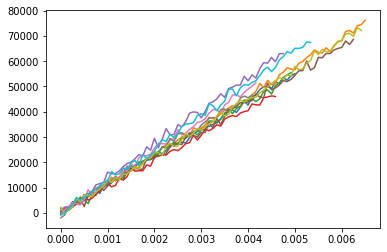

In [2]:
# Different number of stress-strain pairs were recorded for each specimen.
# These are limit values:
min_points = 50
max_points = 80



# Standard deviation of measurement error.
stddev_stress = 1000.0  # kPa

# Set strain "loading step" reasonably.
tensile_strength = 80_000  # kPa
strain_at_failure = tensile_strength / (mu_E * 1e6)
step = strain_at_failure / max_points

# Numbers of data points for each specimen.
M = [random.randint(min_points, max_points) for i in range(N)]

# Returns list of prescribed strains for i-th specimen.
def get_list_of_strains(i):
    return [step * i for i in range(M[i])]

# List of lists of prescribed strain for each specimen
strains = [get_list_of_strains(i) for i in range(N)]  # [-]

# Returns list of measured (random) stress for i-th specimen.
def get_list_of_stresses(i):
    return [np.random.normal(1e6 * E[i] * strains[i][j], stddev_stress)
            for j in range(M[i])]

# List of lists of stress measures stress for each specimen
stresses = [get_list_of_stresses(i) for i in range(N)]

# Plot the lines
for i in range(N):
    plt.plot(strains[i], stresses[i])

# Save the data to individual files. One file per specimen.
def save_specimen_data(i):
    path = directory + "tensile_test-{:06d}.csv".format(i)
    with open(path, mode='w') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerow(['strain [-]', 'stress [kPa]'])
        writer.writerows(zip(strains[i], stresses[i]))


for i in range(N):
    save_specimen_data(i)